In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Communicable Diseases
* incedenceOfMalaria.csv-> Malaria incidence per 1000 population at risk
* incedenceOfTuberculosis.csv-> Incidence of TB per 100,000 population per year.
* hepatitusBsurfaceAntigen.csv -> Hepatitis B surface antigen (HBsAg) prevalence among children under 5 years)
* interventionAgianstNTD's.csv -> Reported number of people requiring interventions against NTDs.
* newHivInfections.csv ->New HIV infections per 1000 uninfected population

In [2]:
malaria = pd.read_csv("Data/incedenceOfMalaria.csv")
tuberculosis = pd.read_csv("Data/incedenceOfTuberculosis.csv")
hepatiteB = pd.read_csv("Data/hepatitusBsurfaceAntigen.csv")
HIV = pd.read_csv("Data/newHivInfections.csv")
NTDs = pd.read_csv("Data/interventionAgianstNTDs.csv")

# Malaria

In [3]:
malaria.head()

,Location,Indicator,Period,First Tooltip
0,Afghanistan,Malaria incidence (per 1 000 population at risk),2018,29.01
1,Afghanistan,Malaria incidence (per 1 000 population at risk),2017,27.07
2,Afghanistan,Malaria incidence (per 1 000 population at risk),2016,26.11
3,Afghanistan,Malaria incidence (per 1 000 population at risk),2015,14.91
4,Afghanistan,Malaria incidence (per 1 000 population at risk),2014,12.67


In [4]:
allCountries = malaria['Location'].unique().tolist()

In [5]:
# allCountries

In [6]:
def compareCountries(countries):
    fig = plt.figure(figsize = (10,10))
    ax1 = plt.subplot2grid((1,1),(0,0))

    for country in countries:
        if country not in allCountries:
            print(f"Country {country} DO NOT EXIST ")
            return
        tempData = malaria[malaria['Location'] == country]
        tempData['Period'] = pd.to_datetime(tempData['Period'], format = '%Y')
        ax1.plot(tempData['Period'], tempData['First Tooltip'], label=country)
        
    for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
    plt.grid()
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("Malaria incidence")
    plt.title("Malaria incidence (per 1 000 population at risk)")
    plt.show()

Enter the countries you want to show : 
India Bhutan Nepal Malaysia


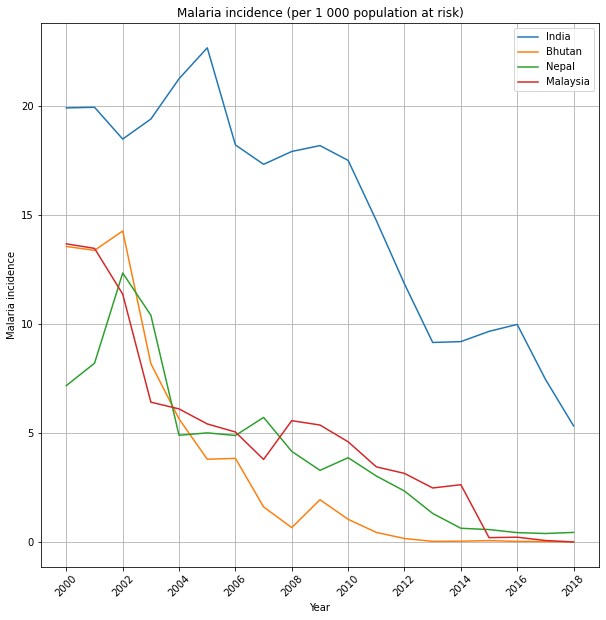

In [7]:
print("Enter the countries you want to show : ")
x = [s for s in input().split(" ")]
compareCountries(x)

In [8]:
def autoLabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height, '%d'%int(height), ha='center', va = 'bottom')

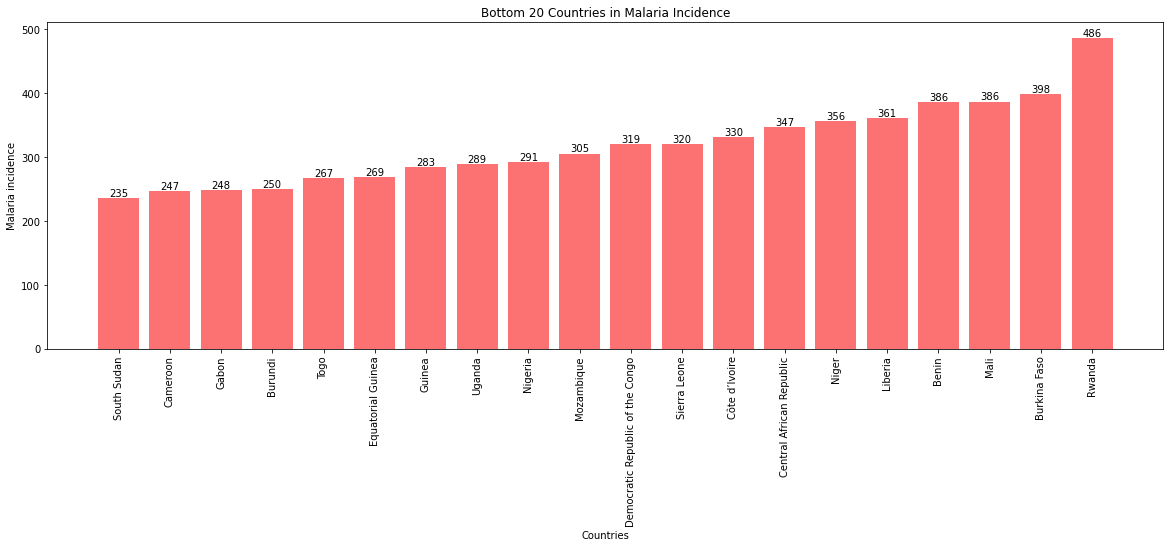

In [9]:
tempData = malaria[malaria['Period'] == 2018]
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[-20:]
fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "#fc7272")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Malaria incidence")
plt.title("Bottom 20 Countries in Malaria Incidence")
plt.show()

There are many countries which have 0 Malaria incidence in 2018, lets look at them 

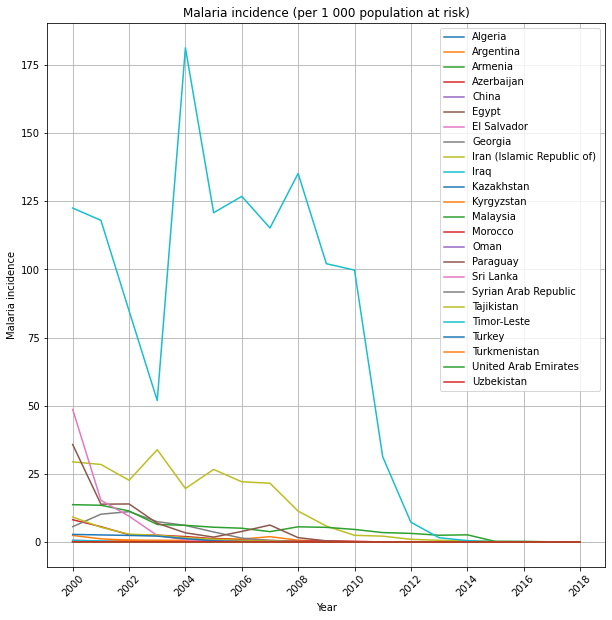

In [10]:
tempData = malaria[malaria['Period'] == 2018]
tempData = tempData[tempData['First Tooltip'] == 0.0]
bestCountries=tempData['Location'].values.tolist()
compareCountries(bestCountries)

This Graph does not show us much information, but it tells us there are some countries which makes very high progess over the year. so it is intresting to see which countries makes the highest progress

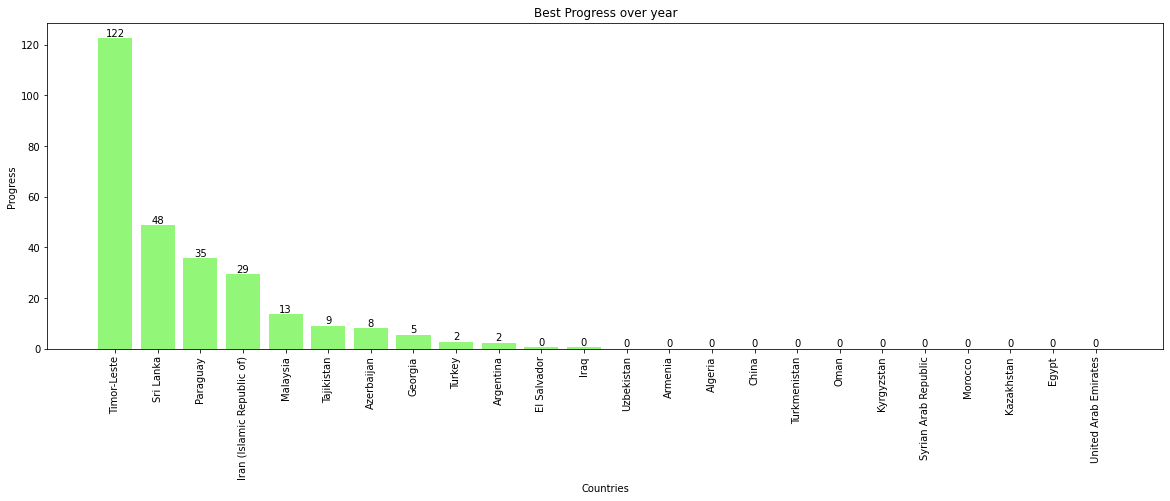

In [11]:
tempData = malaria[malaria['Period'] == 2018]
tempData = tempData[tempData['First Tooltip'] == 0.0]
bestCountries=tempData['Location'].values.tolist()
tempData = malaria[malaria.Location.isin(bestCountries)]
tempData = tempData[tempData['Period'] == 2000]
tempData.sort_values('First Tooltip', ascending=False, inplace=True)

fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempData['Location'], tempData['First Tooltip'], color = "#92f779")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Progress")
plt.title("Best Progress over year")
plt.show()

Countries with highest Progess :- Timor-Leste <br> Lets look at these countries progress

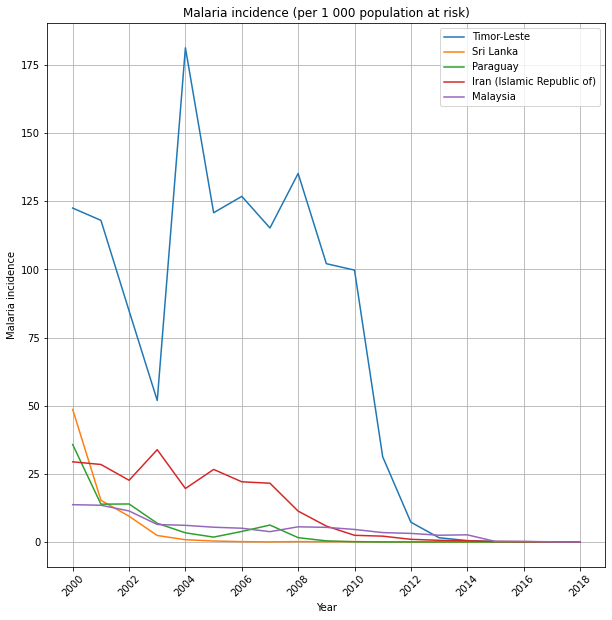

In [12]:
countries = ['Timor-Leste', 'Sri Lanka', 'Paraguay', 'Iran (Islamic Republic of)', 'Malaysia']
compareCountries(countries)

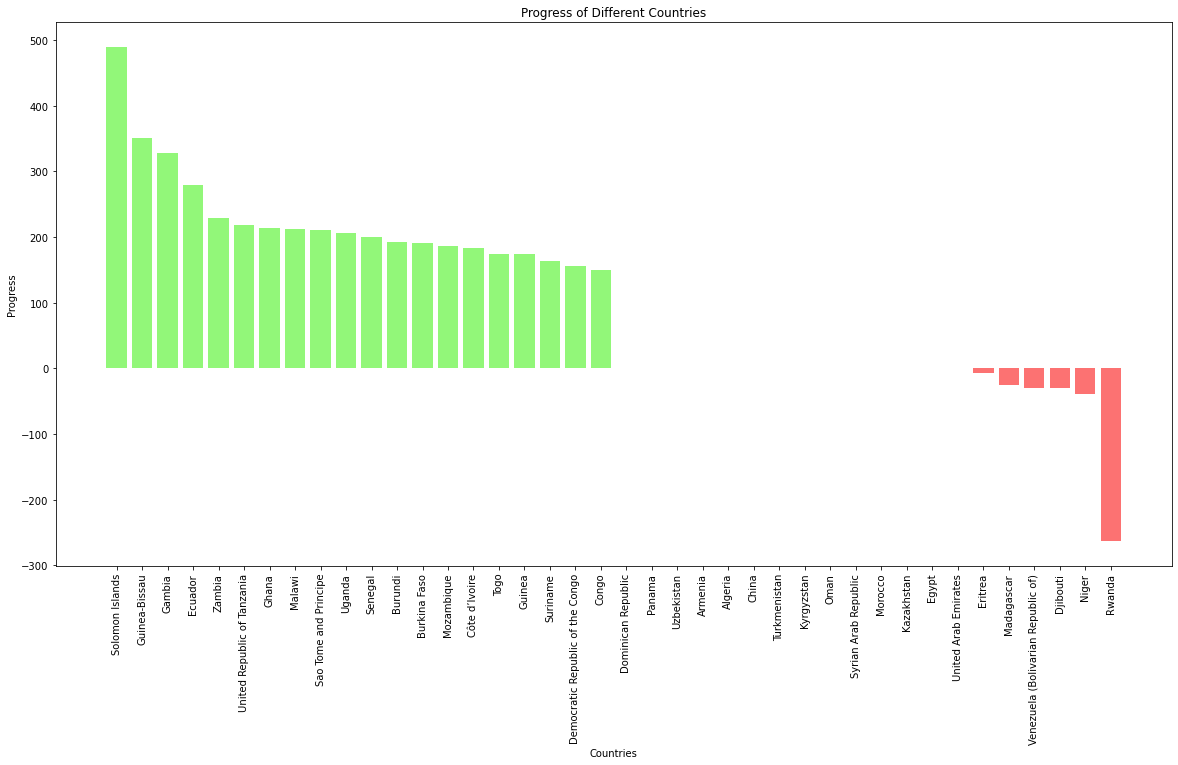

In [13]:
tempData2018 = malaria[malaria['Period'] == 2018]
tempData2000 = malaria[malaria['Period'] == 2000]
tempData2018.reset_index(inplace=True)
tempData2000.reset_index(inplace=True)
tempData = tempData2018.join(tempData2000, lsuffix='_18', rsuffix='_00')
tempData['progress'] = tempData['First Tooltip_00'] - tempData['First Tooltip_18']
tempData = tempData[['Location_18', 'progress']].sort_values('progress', ascending=False)
tempDataTop = tempData[:20]
tempDataBot = tempData[-20:]

fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
rects1 = ax1.bar(tempDataTop['Location_18'], tempDataTop['progress'], color = '#92f779')
rects1 = ax1.bar(tempDataBot['Location_18'], tempDataBot['progress'], color = '#fc7272')
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

plt.xlabel("Countries")
plt.ylabel("Progress")
plt.title("Progress of Different Countries")
plt.show()

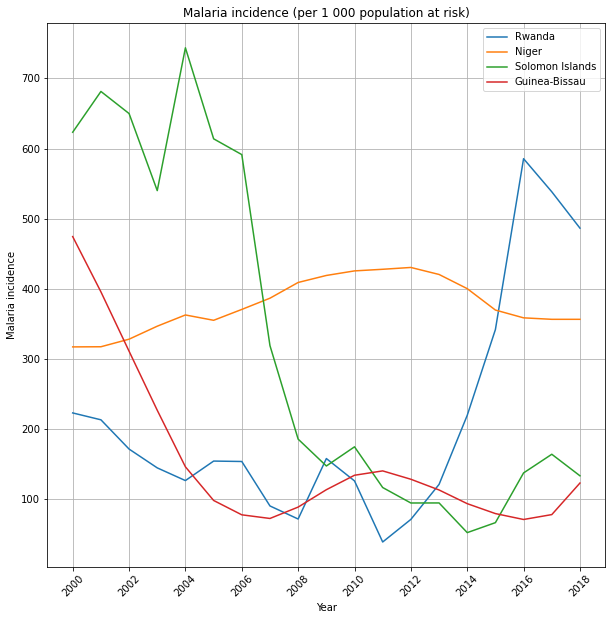

In [14]:
countries = ['Rwanda', 'Niger', 'Solomon Islands', 'Guinea-Bissau']
compareCountries(countries)

# Tuberculosis

In [15]:
tuberculosis.head()

,Location,Indicator,Period,First Tooltip
0,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2019,189 [122-270]
1,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2018,189 [122-270]
2,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2017,189 [122-270]
3,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2016,189 [122-270]
4,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2015,189 [122-270]


In [16]:
allCountries = tuberculosis['Location'].unique().tolist()
print(len(allCountries))

195


In [17]:
# allCountries

In [18]:
tuberculosis['Lower'] = tuberculosis['First Tooltip'].apply(lambda s:float(s.split(" ")[1][1:-1].split("-")[0]))
tuberculosis['Upper'] = tuberculosis['First Tooltip'].apply(lambda s:float(s.split(" ")[1][1:-1].split("-")[1]))
tuberculosis['First Tooltip'] = tuberculosis['First Tooltip'].apply(lambda s:float(s.split(" ")[0]))

In [19]:
tuberculosis.head()

,Location,Indicator,Period,First Tooltip,Lower,Upper
0,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2019,189.0,122.0,270.0
1,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2018,189.0,122.0,270.0
2,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2017,189.0,122.0,270.0
3,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2016,189.0,122.0,270.0
4,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2015,189.0,122.0,270.0


In [20]:
def compareCountries(countries):
    fig = plt.figure(figsize = (10,10))
    ax1 = plt.subplot2grid((1,1),(0,0))

    for country in countries:
        if country not in allCountries:
            print(f"Country {country} DO NOT EXIST ")
            return
        tempData = tuberculosis[tuberculosis['Location'] == country]
        tempData['Period'] = pd.to_datetime(tempData['Period'], format = '%Y')
        ax1.plot(tempData['Period'], tempData['First Tooltip'], label=country)
    for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
    plt.grid()
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("Tuberculosis incidence")
    plt.title("Tuberculosis incidence (per 100,000 population at risk)")
    plt.show()

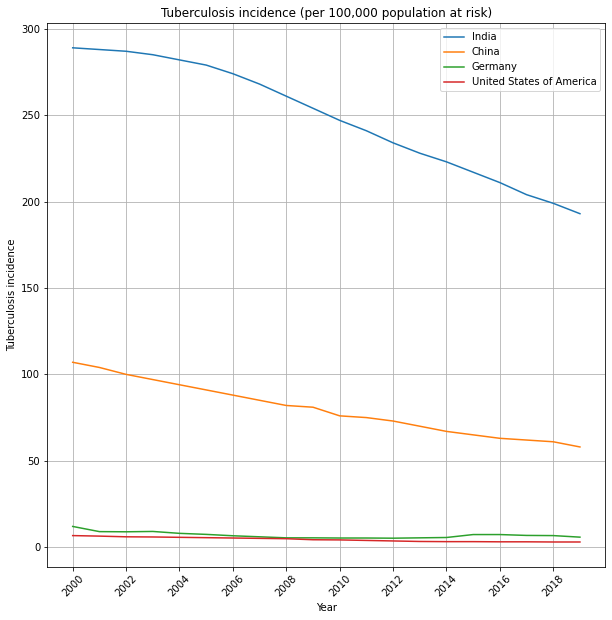

In [21]:
compareCountries(['India', 'China', 'Germany', 'United States of America'])

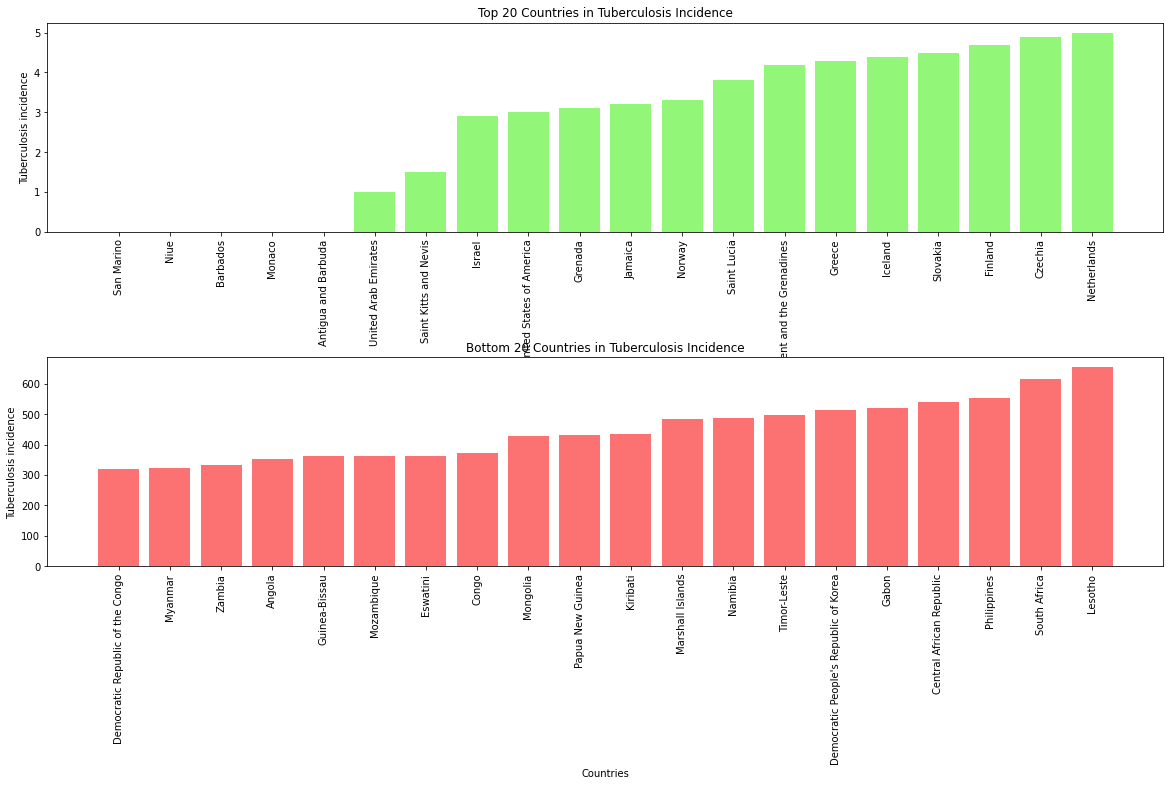

In [22]:
tempData = tuberculosis[tuberculosis['Period'] == 2019]
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[-20:]
tempDataTop = tempData[:20]
fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid((2,1),(0,0))
rects1 = ax1.bar(tempDataTop['Location'], tempDataTop['First Tooltip'], color = "#92f779")
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax1.set_ylabel("Tuberculosis incidence")
ax1.set_title("Top 20 Countries in Tuberculosis Incidence")
    
ax2 = plt.subplot2grid((2,1),(1,0))
rects2 = ax2.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "#fc7272")
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

ax2.set_xlabel("Countries")
ax2.set_ylabel("Tuberculosis incidence")
ax2.set_title("Bottom 20 Countries in Tuberculosis Incidence")
plt.subplots_adjust(hspace = 0.6)
plt.show()

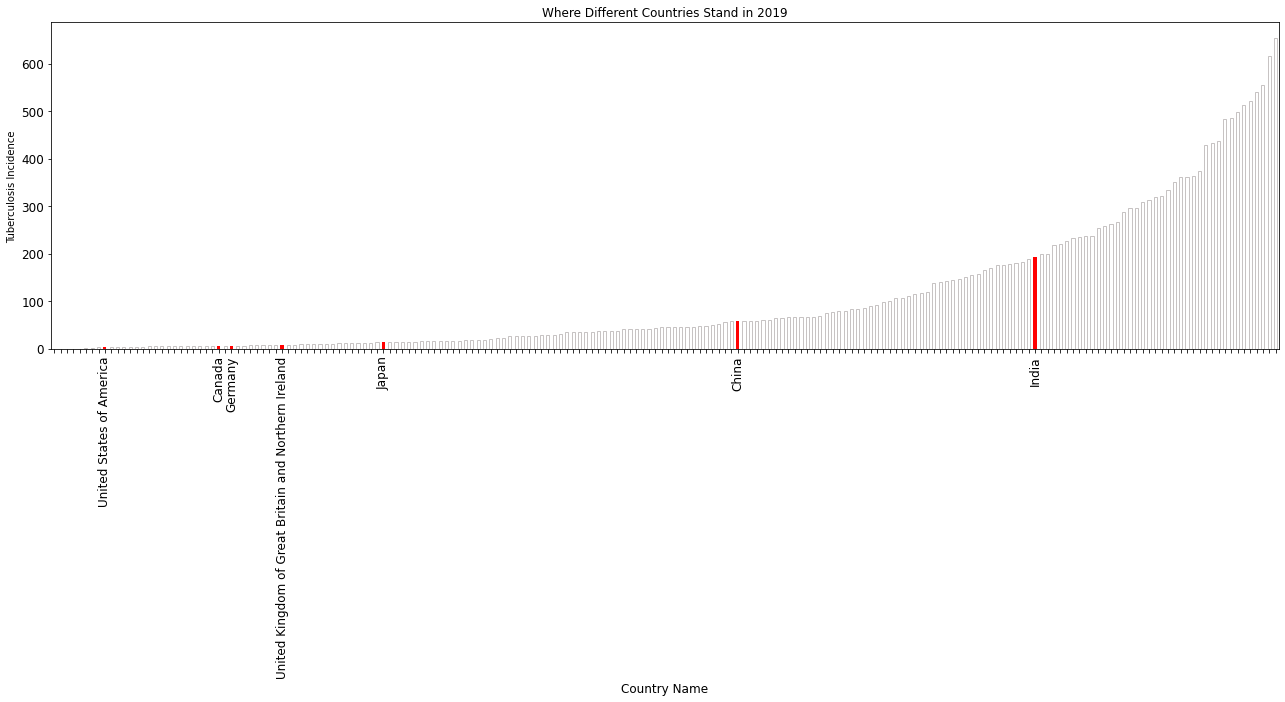

In [23]:
tempData = tuberculosis[tuberculosis['Period'] == 2019]
tempData.sort_values('First Tooltip', inplace=True)
tempData.reset_index(inplace=True)
tempData.set_index('Location',drop=True,inplace=True)
countries=['India', 'China', 'United States of America', 'Germany',
           'United Kingdom of Great Britain and Northern Ireland', 
           'Japan', 'Canada']


ax_1 = tempData['First Tooltip'].plot(kind='bar', title ="graph", figsize=(22, 6), fontsize=12)
ax_1.set_xlabel("Country Name", fontsize=12)
ax_1.set_title("Where Different Countries Stand in 2019")
ax_1.set_ylabel("Tuberculosis Incidence")
for ticks in ax_1.xaxis.get_major_ticks():
    if ticks.label1.get_text() not in countries:
        ticks.label1.set_visible(False)
        ax_1.patches[tempData.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('w')
        ax_1.patches[tempData.index.get_indexer([ticks.label1.get_text()])[0]].set_edgecolor('#c7c3c3')
    else:
        ax_1.patches[tempData.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('r')
        

Lets Look at the progress of TOP 5 and BOTTOM 5 countries

Plot For TOP 5 Countries


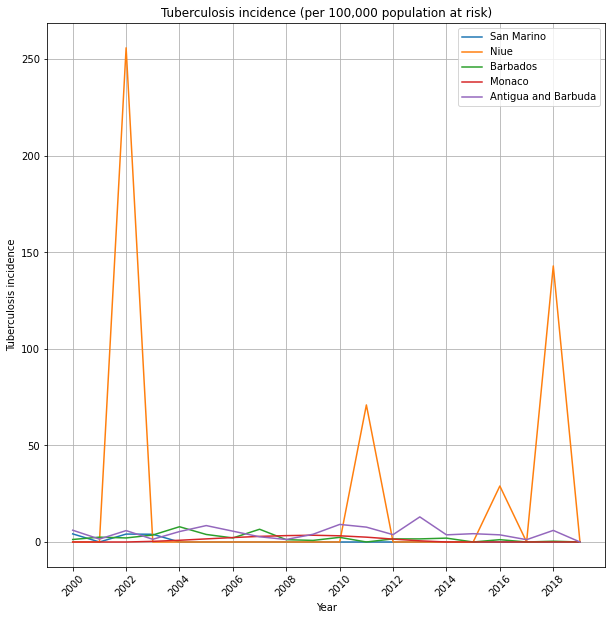

Plot For BOTTOM 5 Countries


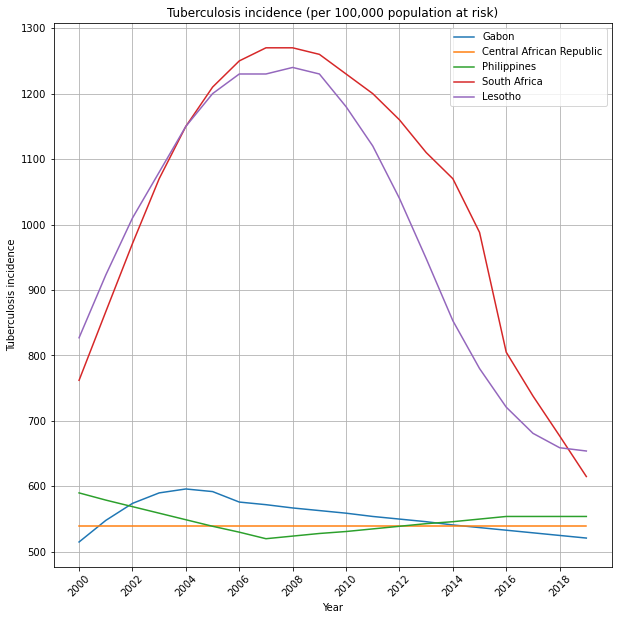

In [24]:
tempData = tuberculosis[tuberculosis['Period'] == 2019]
tempData.sort_values('First Tooltip', inplace=True)
top5countries = tempData[:5].Location.values.tolist()
bot5countries = tempData[-5:].Location.values.tolist()
print("Plot For TOP 5 Countries")
compareCountries(top5countries)
print("Plot For BOTTOM 5 Countries")
compareCountries(bot5countries)


Lets look at when each country achieve its peak.

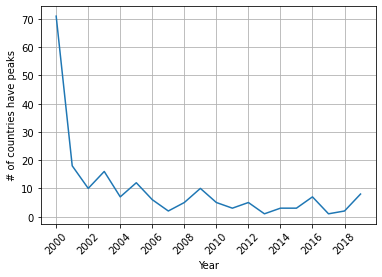

In [25]:
tempData = tuberculosis.sort_values('First Tooltip', ascending=False).groupby("Location").first()
tempData = tempData.groupby("Period")['First Tooltip'].count()
tempData = tempData.reset_index()
tempData['Period'] = pd.to_datetime(tempData['Period'], format = '%Y')
fig = plt.figure()
ax = plt.subplot2grid((1,1),(0,0))
ax.plot(tempData['Period'], tempData['First Tooltip'])
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.xlabel("Year")
plt.ylabel("# of countries have peaks")
plt.title("")
plt.grid()

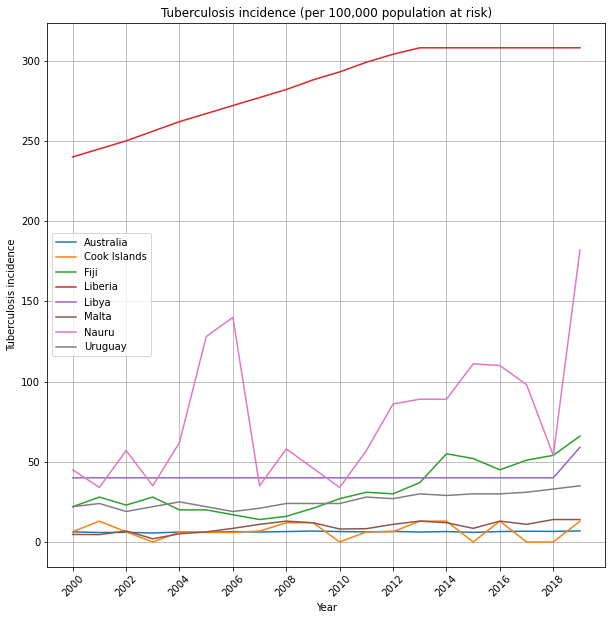

In [26]:
tempData = tuberculosis.sort_values('First Tooltip', ascending=False).groupby("Location").first().reset_index()
countriesPeak2019 = tempData[tempData['Period'] == 2019].Location.values.tolist()
compareCountries(countriesPeak2019)

Lets Look at the progress

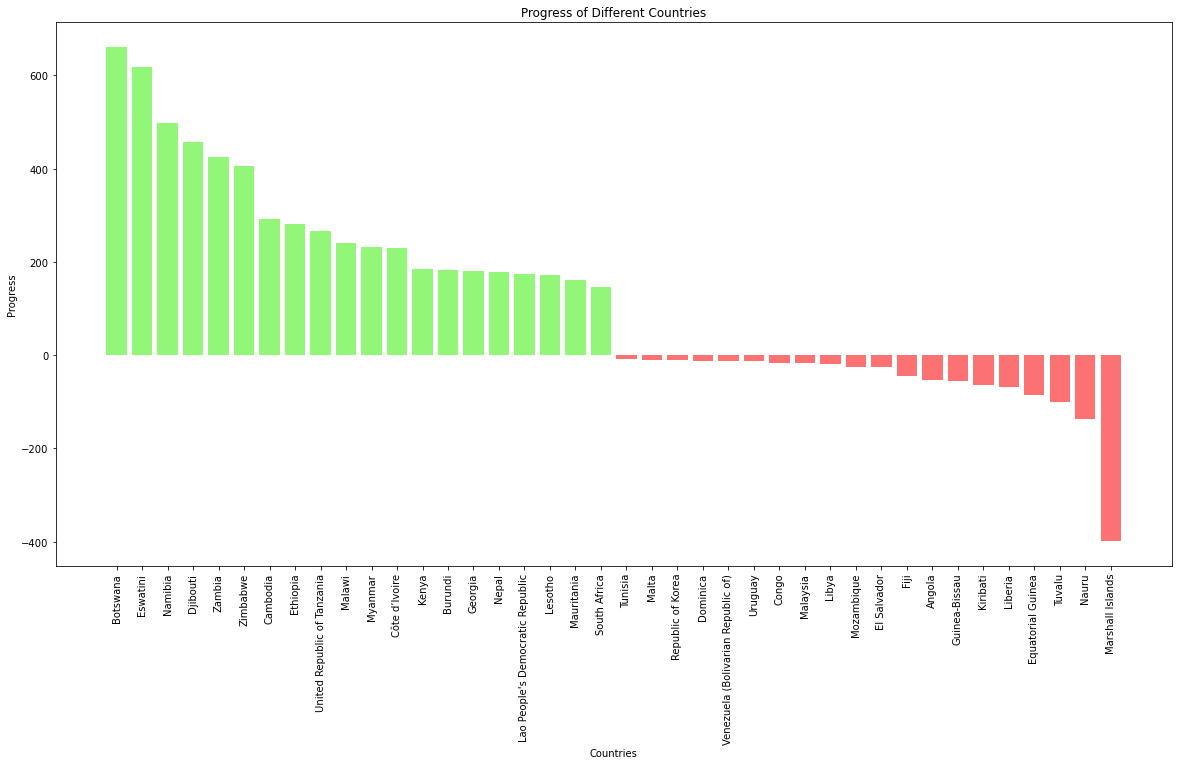

In [27]:
tempData2019 = tuberculosis[tuberculosis['Period'] == 2019]
tempData2000 = tuberculosis[tuberculosis['Period'] == 2000]

tempData2019.set_index("Location", inplace=True)
tempData2000.set_index("Location", inplace=True)

tempData = tempData2019.join(tempData2000, lsuffix='_19', rsuffix='_00')
tempData['progress'] = tempData['First Tooltip_00'] - tempData['First Tooltip_19']
tempData.dropna(inplace=True)
tempData.reset_index(inplace=True)
tempData = tempData[['Location', 'progress']].sort_values('progress', ascending=False)
tempDataTop = tempData[:20]
tempDataBot = tempData[-20:]

fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
rects1 = ax1.bar(tempDataTop['Location'], tempDataTop['progress'], color = '#92f779')
rects1 = ax1.bar(tempDataBot['Location'], tempDataBot['progress'], color = '#fc7272')
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

plt.xlabel("Countries")
plt.ylabel("Progress")
plt.title("Progress of Different Countries")
plt.show()

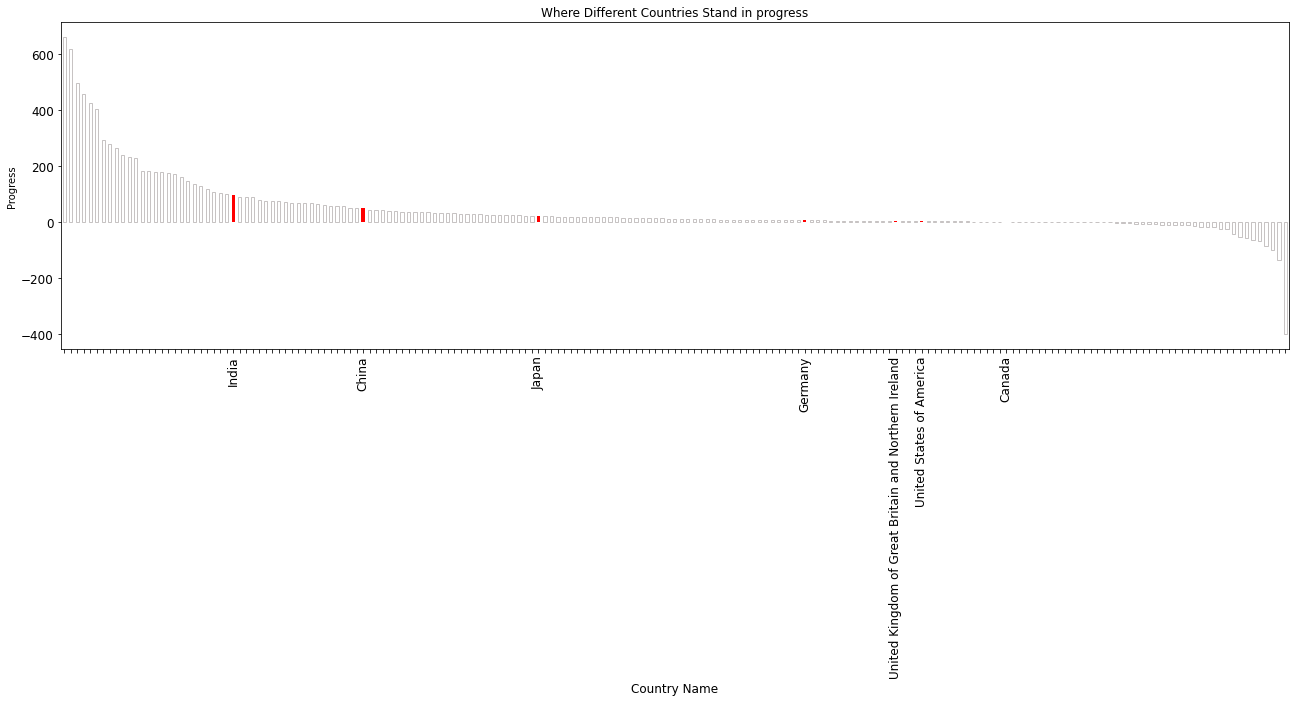

In [28]:
tempData2019 = tuberculosis[tuberculosis['Period'] == 2019]
tempData2000 = tuberculosis[tuberculosis['Period'] == 2000]

tempData2019.set_index("Location", inplace=True)
tempData2000.set_index("Location", inplace=True)

tempData = tempData2019.join(tempData2000, lsuffix='_19', rsuffix='_00')
tempData['progress'] = tempData['First Tooltip_00'] - tempData['First Tooltip_19']
tempData.dropna(inplace=True)
tempData.reset_index(inplace=True)
tempData = tempData[['Location', 'progress']].sort_values('progress', ascending=False)
tempData.set_index("Location", inplace=True)

countries=['India', 'China', 'United States of America', 'Germany',
           'United Kingdom of Great Britain and Northern Ireland', 
           'Japan', 'Canada']


ax_1 = tempData['progress'].plot(kind='bar', title ="graph", figsize=(22, 6), fontsize=12)
ax_1.set_xlabel("Country Name", fontsize=12)
ax_1.set_title("Where Different Countries Stand in progress")
ax_1.set_ylabel("Progress")
for ticks in ax_1.xaxis.get_major_ticks():
    if ticks.label1.get_text() not in countries:
        ticks.label1.set_visible(False)
        ax_1.patches[tempData.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('w')
        ax_1.patches[tempData.index.get_indexer([ticks.label1.get_text()])[0]].set_edgecolor('#c7c3c3')
    else:
        ax_1.patches[tempData.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('r')
        

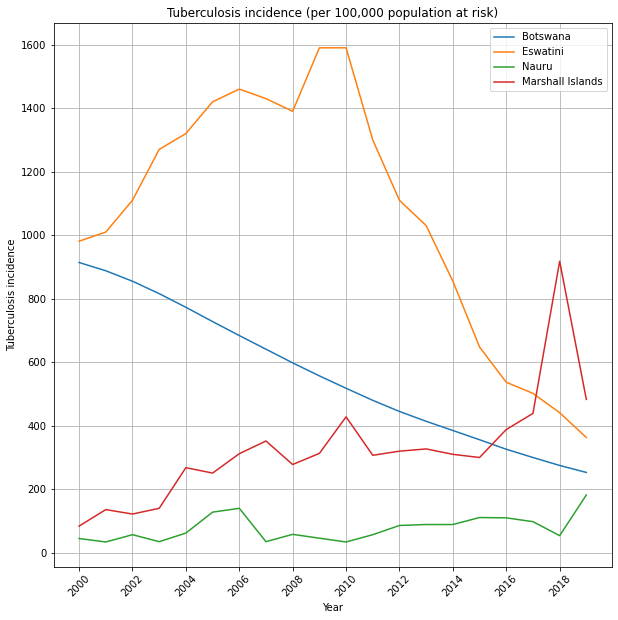

In [29]:
countries = ['Botswana', 'Eswatini', 'Nauru', 'Marshall Islands']
compareCountries(countries)

# Hepatite-B

In [30]:
hepatiteB['Lower'] = hepatiteB['First Tooltip'].apply(lambda s:float(s.split(" ")[1][1:-1].split("-")[0]))
hepatiteB['Upper'] = hepatiteB['First Tooltip'].apply(lambda s:float(s.split(" ")[1][1:-1].split("-")[1]))
hepatiteB['First Tooltip'] = hepatiteB['First Tooltip'].apply(lambda s:float(s.split(" ")[0]))

In [31]:
hepatiteB.head()

,Location,Indicator,Period,First Tooltip,Lower,Upper
0,Afghanistan,Hepatitis B surface antigen (HBsAg) prevalence...,2015,0.50,0.29,0.78
1,Albania,Hepatitis B surface antigen (HBsAg) prevalence...,2015,1.29,0.83,1.91
2,Algeria,Hepatitis B surface antigen (HBsAg) prevalence...,2015,0.22,0.12,0.34
3,Andorra,Hepatitis B surface antigen (HBsAg) prevalence...,2015,0.08,0.00,1.65
4,Angola,Hepatitis B surface antigen (HBsAg) prevalence...,2015,4.85,3.29,6.81


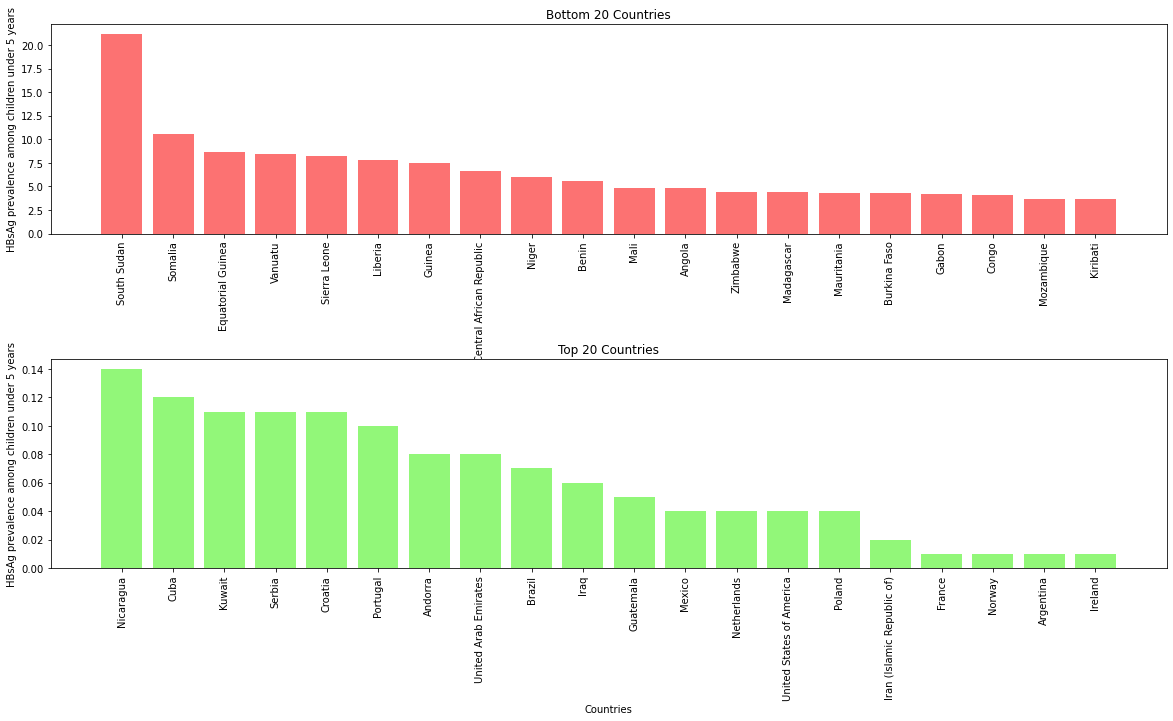

In [32]:
tempData = hepatiteB[['Location','First Tooltip']].sort_values("First Tooltip", ascending=False)
tempDataTop = tempData[:20]
tempDataBot = tempData[-20:]

fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid((2,1), (0,0))
ax1.bar(tempDataTop['Location'], tempDataTop['First Tooltip'], color = "#fc7272")
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax1.set_ylabel("HBsAg prevalence among children under 5 years")
ax1.set_title("Bottom 20 Countries")

ax2 = plt.subplot2grid((2,1), (1,0))
ax2.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "#92f779")
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
ax2.set_ylabel("HBsAg prevalence among children under 5 years")
ax2.set_title("Top 20 Countries")
ax2.set_xlabel("Countries")

plt.subplots_adjust(hspace = 0.6)
plt.show()

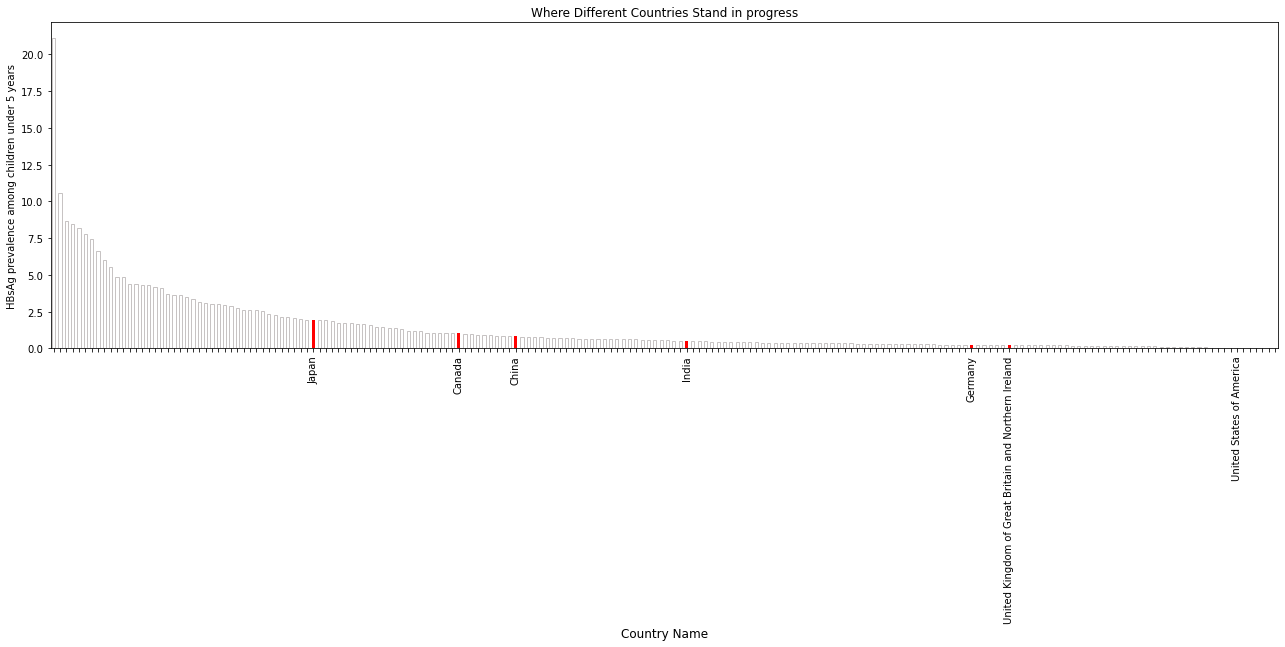

In [33]:
tempData = hepatiteB[['Location','First Tooltip']].sort_values("First Tooltip", ascending=False)
tempData.set_index('Location', inplace=True)

countries=['India', 'China', 'United States of America', 'Germany',
           'United Kingdom of Great Britain and Northern Ireland', 
           'Japan', 'Canada']


ax_1 = tempData['First Tooltip'].plot(kind='bar', figsize=(22, 6))
ax_1.set_xlabel("Country Name", fontsize=12)
ax_1.set_title("Where Different Countries Stand in progress")
ax_1.set_ylabel("HBsAg prevalence among children under 5 years")
for ticks in ax_1.xaxis.get_major_ticks():
    if ticks.label1.get_text() not in countries:
        ticks.label1.set_visible(False)
        ax_1.patches[tempData.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('w')
        ax_1.patches[tempData.index.get_indexer([ticks.label1.get_text()])[0]].set_edgecolor('#c7c3c3')
    else:
        ax_1.patches[tempData.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('r')
        